In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# prompt: i want to read the csv file /content/50_Startups.csv, generate me the code

# Load the dataset
file_path = "/content/50_Startups.csv"
startup = pd.read_csv(file_path)

# Print some info
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


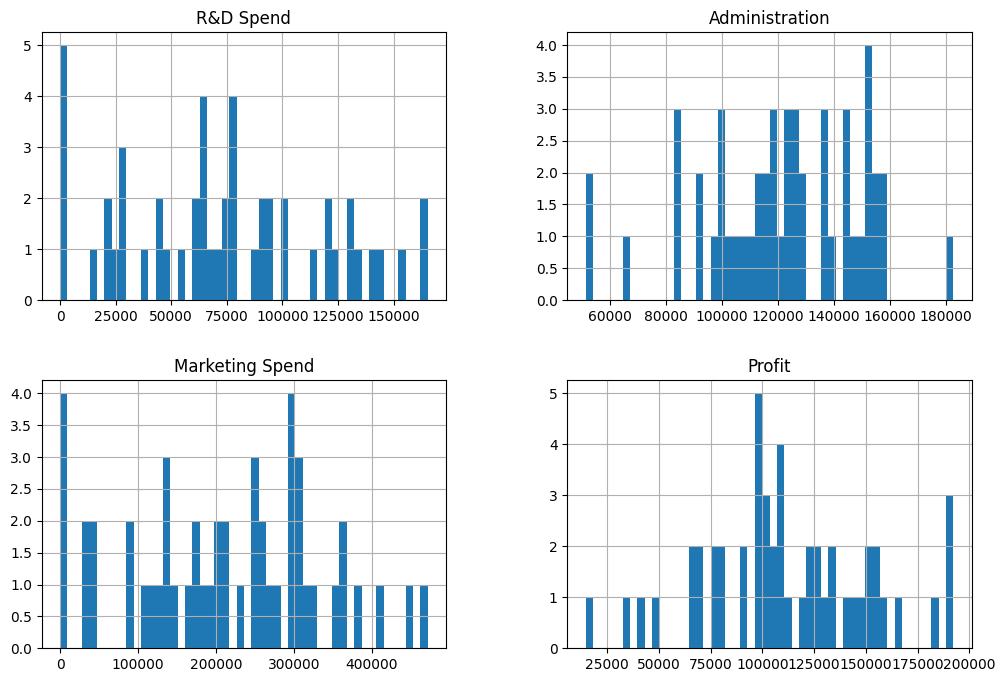

In [ ]:
startup.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
startup.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
# prompt: create 2 models for linear regression model for /content/50_Startups.csv with dependent variable as Profit and independent variable as R&D spend in first and second with dependent variable as Profit and independent variable as Marketing spend

# First Model: R&D Spend vs Profit
X1 = startup[['R&D Spend']]
y1 = startup['Profit']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
r2_1 = r2_score(y1_test, y1_pred)
print(model1.intercept_)
print(f"R-squared for R&D Spend model: {r2_1}")


# Second Model: Marketing Spend vs Profit
X2 = startup[['Marketing Spend']]
y2 = startup['Profit']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
r2_2 = r2_score(y2_test, y2_pred)
print(model2.intercept_)
print(f"R-squared for Marketing Spend model: {r2_2}")

49336.6680379911
R-squared for R&D Spend model: 0.9265108109341951
48923.31296724075
R-squared for Marketing Spend model: -0.11205578997827947


In [ ]:
import pickle

In [ ]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(model1,f)

In [ ]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [ ]:
X1[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [ ]:
clf2.predict(X1[0:5])

array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [ ]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905


In [ ]:
# prompt: create multiple linear regression for /content/50_Startups.csv file with dependent variable as Profit and R&D Spend, Administration, Marketing spend, State as independent variable

# Multiple Linear Regression

# Define features (X) and target (y)
X = startup[['R&D Spend', 'Administration', 'Marketing Spend']]
y = startup['Profit']

# Convert 'State' column to numerical using one-hot encoding
X = pd.get_dummies(startup, columns=['State'], drop_first=True)
X = X[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Make predictions on the test set
y_pred_multiple = model_multiple.predict(X_test)

# Evaluate the model
r2_multiple = r2_score(y_test, y_pred_multiple)
print(f"R-squared for Multiple Linear Regression model: {r2_multiple}")

# Display the coefficients and intercept
print("Coefficients:", model_multiple.coef_)
print("Intercept:", model_multiple.intercept_)

R-squared for Multiple Linear Regression model: 0.8987266414328637
Coefficients: [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]
Intercept: 54028.03959364581


High Model Fit: The R-squared value of 0.8987 indicates that 89.87% of the variation in Profit is explained by the independent variables, suggesting a strong model fit.

Significant Impact of R&D Spend: The coefficient for R&D Spend (0.8056) shows it has the most substantial positive impact on Profit compared to other variables.

Negative Effect of Administration: The coefficient for Administration (-0.0688) indicates a slight negative relationship, suggesting that higher administrative expenses may reduce profit.

Positive Role of Marketing Spend: A coefficient of 0.0299 for Marketing Spend shows a small but positive impact on profit.

High Intercept Value: The intercept (54028.04) represents the baseline profit when all independent variables are zero, showing a significant base value.